1. Lasso and Ridge
Perform Lasso and Ridge regression on the california housing dataset california_housing.csv to predict “median_house_value”. Visualize the effect of different alpha values on the coefficients. Hint: The logarithm is your friend

In [ ]:
# Load the functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso

In [ ]:
# Load the California housing dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/04_MachineLearning/california_housing.csv')
df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0


1.1. Work first with a random subsample of 500 data points and drop the column “total_bedroom”. (pandas.DataFrame.sample, don’t forget to set a random_state for repeatability).[link text](https://)

In [ ]:
# Building the train and test datasets
# 1. Define Features and Independent var. (i.e., drop the 'total_bedrooms')
features=df[['longitude','latitude','housing_median_age','total_rooms','population','households','median_income']] 
house_value=df['median_house_value']
features.shape

(20640, 7)

In [ ]:
#  2. building the train and test data sets
X_train, X_test, y_train, y_test = train_test_split(features, house_value, test_size=0.2, random_state= 42)
X_train.shape, X_test.shape

((16512, 7), (4128, 7))

1.2. Compare the values of coefficients obtained by these two methods with those that you obtain without applying any regularization . Use visuals wherever necessary! Remember: It is important to scale the features to a similar scale. Hint: Use a pipeline.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# Coefficients without any regularization
pipeline1 = Pipeline(steps=[
    ('standard_scale', StandardScaler()),
    ('modeling', LinearRegression())]
)

pipeline1

Pipeline(steps=[('standard_scale', StandardScaler()),
                ('modeling', LinearRegression())])

In [ ]:
pipeline1.fit(X_train, y_train)

pred1 = pipeline1.predict(X_test)

In [ ]:
#cross validation
print('MAE', metrics.mean_absolute_error(y_test, pred1))
print('MSE', metrics.mean_squared_error(y_test, pred1))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred1)))
print('R2 Score', metrics.r2_score(y_test, pred1))

MAE 51657.465162253386
MSE 4972764891.781902
RMSE 70517.83385627995
R2 Score 0.6205180997418556


In [ ]:
# Coefficients 
coef = pipeline1.named_steps['modeling'].coef_

df1= pd.DataFrame (
    {
        'feature':X_train.columns,
        'Without_Coef':coef
    }
)

In [ ]:
# Coefficients with Lasso Regulatioin
pipeline2 = Pipeline(steps=[
    ('standard_scale', StandardScaler()),
    ('modeling', Lasso())]
)

pipeline2

Pipeline(steps=[('standard_scale', StandardScaler()), ('modeling', Lasso())])

In [ ]:
pipeline2.fit(X_train, y_train)

pred2 = pipeline2.predict(X_test)

In [ ]:
#Cross validation 
print('MAE', metrics.mean_absolute_error(y_test, pred2))
print('MSE', metrics.mean_squared_error(y_test, pred2))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('R2 Score', metrics.r2_score(y_test, pred2))

MAE 51657.50246446144
MSE 4972763869.0583725
RMSE 70517.82660475557
R2 Score 0.6205181777879882


In [ ]:
# Coefficients 
coef = pipeline2.named_steps['modeling'].coef_

df2= pd.DataFrame (
    {
    'feature':X_train.columns,
     'Lasso_Coef':coef
    }
)

In [ ]:
# Coefficients with Ridge regression
pipeline3 = Pipeline(steps=[
    ('standard_scale', StandardScaler()),
    ('modeling', Ridge())]
)

pipeline3

Pipeline(steps=[('standard_scale', StandardScaler()), ('modeling', Ridge())])

In [ ]:
pipeline3.fit(X_train, y_train)

pred3 = pipeline3.predict(X_test)

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, pred3))
print('MSE', metrics.mean_squared_error(y_test, pred3))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred3)))
print('R2 Score', metrics.r2_score(y_test, pred3))

MAE 51657.4312729976
MSE 4972778535.02777
RMSE 70517.93059235197
R2 Score 0.6205170585977475


In [ ]:
# Coefficients 
coef = pipeline3.named_steps['modeling'].coef_

df3= pd.DataFrame (
    {
    'feature':X_train.columns,
     'Ridge_Coef':coef
    }
)

In [ ]:
df4 = pd.concat([df1, df2.drop(columns=['feature']), df3.drop(columns=['feature'])],  axis=1)
df4

,feature,Without_Coef,Lasso_Coef,Ridge_Coef
0,longitude,-83894.850115,-83884.733121,-83821.857491
1,latitude,-90006.277442,-89996.137430,-89932.003788
2,housing_median_age,14480.021271,14480.741883,14487.649540
3,total_rooms,-3865.090667,-3852.277564,-3857.402896
4,population,-48954.446516,-48945.774228,-48921.828149
5,households,57163.917499,57143.651593,57127.222210
6,median_income,73530.710688,73528.429961,73532.926942


1.3. Show the effect of different alpha values on the coefficients. Hint: Use np.logspace( ).

In [ ]:
# Defining the different alphas
alphas = np.logspace(-5, 6, num=101)
# alphas

In [ ]:
# Applying alphas for each coefficients 
# Linear regression model

coefs=[]
rscore_test=[]
rscore_train=[]

for a in alphas:
  # pipeline1.set_params(modeling__alpha=a) #setting alpha
  pipeline1.fit(X_train, y_train)

  coefs.append(pipeline1.named_steps['modeling'].coef_)
  rscore_test.append(pipeline1.score(X_test, y_test))
  rscore_train.append(pipeline1.score(X_train, y_train))


In [ ]:
# Applying alphas for each coefficients 
# Lasso regression model
alphas = np.logspace(-5, 6, num=101)
alphas
coefs=[]
rscore_test=[]
rscore_train=[]

for a in alphas:
  pipeline2.set_params(modeling__alpha=a) #setting alpha
  pipeline2.fit(X_train, y_train)

  coefs.append(pipeline2.named_steps['modeling'].coef_)
  rscore_test.append(pipeline2.score(X_test, y_test))
  rscore_train.append(pipeline2.score(X_train, y_train))

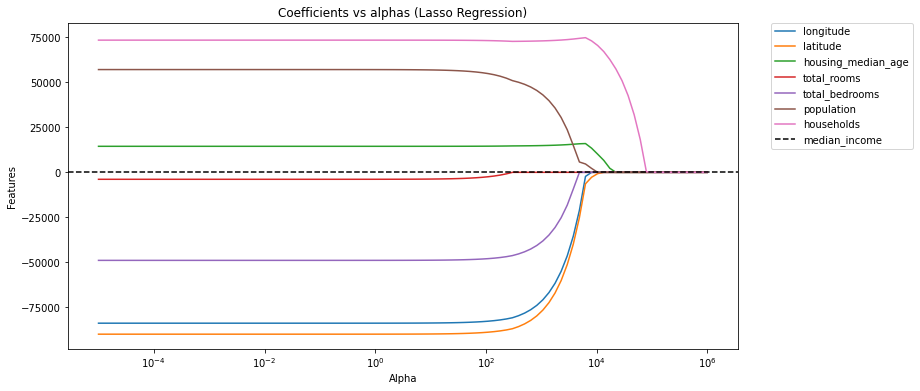

In [ ]:
# visualization
plt.subplots(figsize=[12,6])
plt.plot(alphas, coefs)
plt.xscale("log")    # we apply log scale to have a better view
plt.title("Coefficients vs alphas (Lasso Regression)")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Alpha")
plt.ylabel("Features")
plt.legend(labels=df.columns[:-1], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(False);

In [ ]:
# Applying alphas for each coefficients 
# Ridge regression model
alphas = np.logspace(-5, 6, num=101)
alphas
coefs=[]
rscore_test=[]
rscore_train=[]

for a in alphas:
  pipeline3.set_params(modeling__alpha=a) #setting alpha
  pipeline3.fit(X_train, y_train)

  coefs.append(pipeline3.named_steps['modeling'].coef_)
  rscore_test.append(pipeline3.score(X_test, y_test))
  rscore_train.append(pipeline3.score(X_train, y_train))

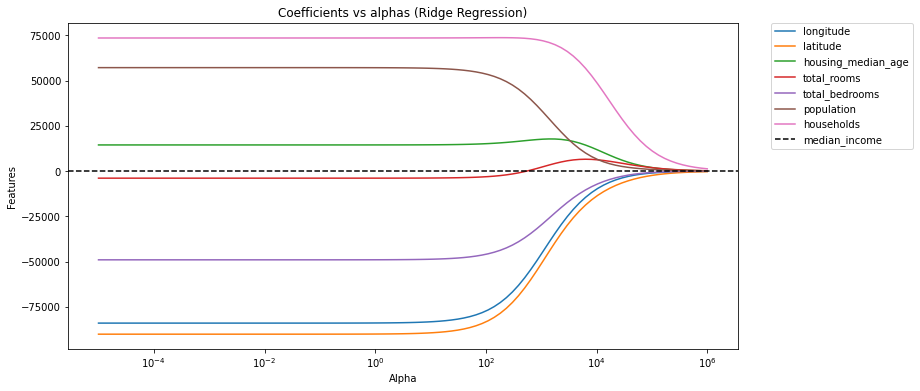

In [ ]:
# visualization
plt.subplots(figsize=[12,6])
plt.plot(alphas, coefs)
plt.xscale("log")    # we apply log scale to have a better view
plt.title("Coefficients vs alphas (Ridge Regression)")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Alpha")
plt.ylabel("Features")
plt.legend(labels=df.columns[:-1], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(False);

1.4. Increase the complexity of the model by adding polynomial features to the pipeline. (you can use sklearn.preprocessing.PolynomialFeatures). Test regularization with different alpha values. Would you expect a stronger or lower effect of regularization for the more complex model?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Coefficients without any regularization
pipeline1 = Pipeline(steps=[
     ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ('standard_scale', StandardScaler()),
    ('modeling', LinearRegression())]
)

pipeline1
np.mean(cross_val_score(pipeline1, X_train, y_train, cv=3))

0.6269745843236659

In [ ]:
# Coefficients with Lasso Regulatioin
pipeline2 = Pipeline(steps=[
     ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ('standard_scale', StandardScaler()),
    # ('modeling', Lasso(tol=0.1))
    ('modeling', Lasso(max_iter=1000))
    ])

pipeline2
# pipeline_lasso_pl.set_params(modeling__alpha=xxxxxx)
np.mean(cross_val_score(pipeline2, X_train, y_train, cv=3))

0.601754711277342

In [ ]:
# Applying alphas for each coefficients 
# Lasso regression model
alphas = np.logspace(-5, 6, num=101)
alphas
coefs=[]
rscore_test=[]
rscore_train=[]

for a in alphas:
  pipeline2.set_params(modeling__alpha=a) #setting alpha
  pipeline2.fit(X_train, y_train)

  coefs.append(pipeline2.named_steps['modeling'].coef_)
  rscore_test.append(pipeline2.score(X_test, y_test))
  rscore_train.append(pipeline2.score(X_train, y_train))



In [ ]:
# rscore_train
rscore_test

[0.6240769062314631]

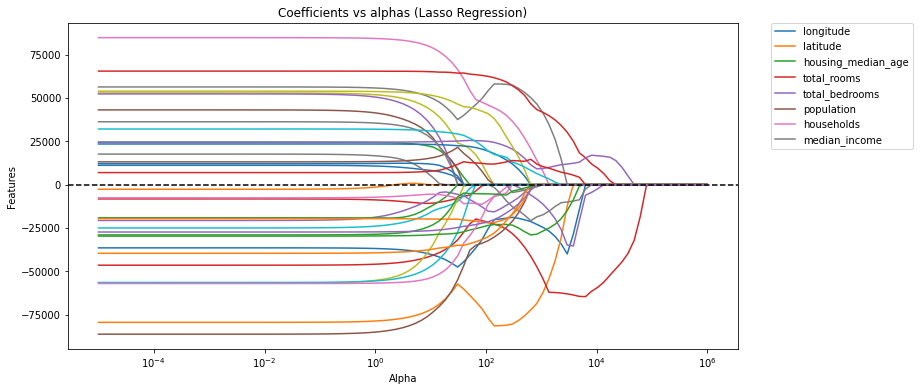

In [ ]:
# visualization
plt.subplots(figsize=[12,6])
plt.plot(alphas, coefs)
plt.xscale("log")    # we apply log scale to have a better view
plt.title("Coefficients vs alphas (Lasso Regression)")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Alpha")
plt.ylabel("Features")
plt.legend(labels=df.columns[:-1], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(False);

In [ ]:
# Coefficients with Ridge regression
pipeline3 = Pipeline(steps=[
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ('standard_scale', StandardScaler()),
    ('modeling', Ridge())]
)

pipeline3
np.mean(cross_val_score(pipeline3, X_train, y_train, cv=3))

0.6969384894766012

In [ ]:
# Applying alphas for each coefficients 
# Ridge regression model
alphas = np.logspace(-5, 6, num=101)
alphas
coefs=[]
rscore_test=[]
rscore_train=[]

for a in alphas:
  pipeline3.set_params(modeling__alpha=a) #setting alpha
  pipeline3.fit(X_train, y_train)

  coefs.append(pipeline3.named_steps['modeling'].coef_)
  rscore_test.append(pipeline3.score(X_test, y_test))
  rscore_train.append(pipeline3.score(X_train, y_train))

In [ ]:
# visualization
plt.subplots(figsize=[12,6])
plt.plot(alphas, coefs)
plt.xscale("log")    # we apply log scale to have a better view
plt.title("Coefficients vs alphas (Ridge Regression)")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Alpha")
plt.ylabel("Features")
plt.legend(labels=df.columns[:-1], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(False);

1.5. Compare the train and test scores from the Ridge and Lasso regression with the train and test scores from the basic Multiple Linear Regression (included polynomial features). Use a plot to visualize the effects of different penalties.



1.6. Investigate the effect of regularization changes when you increase the number of data points. Try 1000, 2000, 5000 and all data points.